**Exploratory data analysis of the BDD dataset**

This looks at the occurrences of classes in the BDD 100k train dataset

The file used to do this is the bdd100k_labels_images_train.json labels file

In [1]:
import pandas as pd
import json

In [2]:
with open('bdd100k_labels_images_train.json') as f:
    full_data = json.load(f)

In [3]:
len(full_data)

69863

In [3]:
photo_names = []
for photo in full_data:
    photo_names.append(photo['name'])

In [5]:
full_data[69858]

{'name': 'fe172415-3c36f3d1.jpg',
 'attributes': {'weather': 'overcast',
  'scene': 'highway',
  'timeofday': 'daytime'},
 'timestamp': 10000,
 'labels': [{'category': 'car',
   'attributes': {'occluded': True,
    'truncated': True,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1248.950941,
    'y1': 320.43946,
    'x2': 1277.943083,
    'y2': 360.112917},
   'id': 1941086},
  {'category': 'bus',
   'attributes': {'occluded': True,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 80.872817,
    'y1': 292.97322,
    'x2': 106.813153,
    'y2': 305.180438},
   'id': 1941087},
  {'category': 'bus',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 166.323338,
    'y1': 216.678112,
    'x2': 592.05005,
    'y2': 335.698483},
   'id': 1

In [6]:
photo_names.index('fe172415-3c36f3d1.jpg')

69858

In [7]:
photo_names.index('0000f77c-6257be58.jpg')

0

In [4]:
test_list = []
test_list.append(full_data[69858])
test_list.append(full_data[0])

In [5]:
test_cat_count = {}
for photo in test_list:
    idx = list(pd.json_normalize(photo, record_path=["labels"], meta=['name'])['category'].value_counts().index)
    vals = list(pd.json_normalize(photo, record_path=["labels"], meta=['name'])['category'].value_counts().values)
    for cat, val in zip(idx, vals):
        if test_cat_count.get(cat):
            test_cat_count[cat] = test_cat_count[cat] + val
        else:
            test_cat_count[cat] = val

In [10]:
test_cat_count

{'lane': 17,
 'traffic light': 11,
 'bus': 3,
 'traffic sign': 6,
 'car': 3,
 'person': 1,
 'drivable area': 2}

In [7]:
data = full_data

In [8]:
%%time
cat_count = {}
for photo in data:
    idx = list(pd.json_normalize(photo, record_path=["labels"], meta=['name'])['category'].value_counts().index)
    vals = list(pd.json_normalize(photo, record_path=["labels"], meta=['name'])['category'].value_counts().values)
    for cat, val in zip(idx, vals):
        if cat_count.get(cat):
            cat_count[cat] = cat_count[cat] + val
        else:
            cat_count[cat] = val

KeyboardInterrupt: 

In [13]:
cat_count

{'traffic sign': 239686,
 'lane': 528643,
 'traffic light': 186117,
 'car': 713211,
 'drivable area': 125723,
 'person': 91349,
 'bus': 11672,
 'truck': 29971,
 'rider': 4517,
 'bike': 7210,
 'motor': 3002,
 'train': 136}

In [14]:
pd.json_normalize(data[0], record_path=["labels"], meta=['name'])

,category,manualShape,manualAttributes,id,attributes.occluded,attributes.truncated,attributes.trafficLightColor,box2d.x1,box2d.y1,box2d.x2,box2d.y2,poly2d,attributes.areaType,attributes.laneDirection,attributes.laneStyle,attributes.laneType,name
0,traffic light,True,True,0,False,False,green,1125.902264,133.184488,1156.978645,210.875445,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
1,traffic light,True,True,1,False,False,green,1156.978645,136.637417,1191.507960,210.875443,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
2,traffic sign,True,True,2,False,False,none,1101.731743,211.122087,1170.790370,233.566141,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
3,traffic sign,True,True,3,False,True,none,0.000000,0.246631,100.381647,122.825696,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
4,car,True,True,4,False,False,none,45.240919,254.530367,357.805838,487.906215,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
5,car,True,True,5,False,False,none,507.827550,221.727518,908.367588,442.715126,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
6,traffic sign,True,True,6,False,True,none,0.156955,0.809282,102.417429,133.411856,NaN,NaN,NaN,NaN,NaN,0000f77c-6257be58.jpg
7,drivable area,True,True,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'vertices': [[1280.195648, 626.372529], [128...",direct,NaN,NaN,NaN,0000f77c-6257be58.jpg
8,lane,True,True,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'vertices': [[503.674413, 373.137193], [357....",NaN,parallel,solid,road curb,0000f77c-6257be58.jpg
9,lane,True,True,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'vertices': [[62.973282, 371.601649], [0, 36...",NaN,parallel,solid,road curb,0000f77c-6257be58.jpg


In [9]:
import matplotlib.pyplot as plt

In [10]:
sorted_dict = {k: v for k, v in sorted(cat_count.items(), key=lambda item: item[1], reverse=True)}

<BarContainer object of 12 artists>

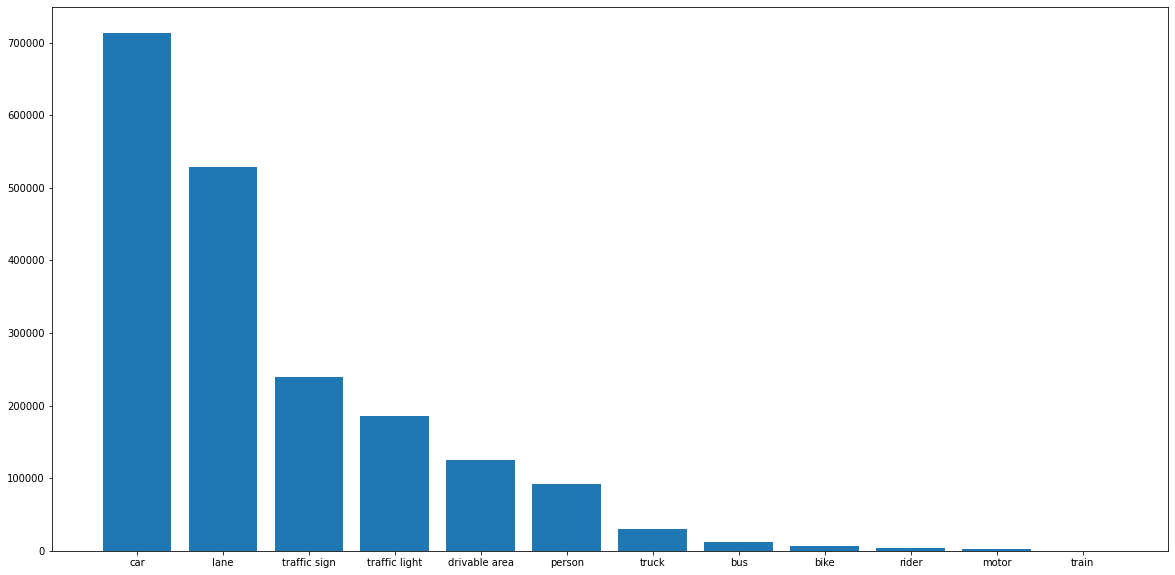

In [17]:
plt.figure(figsize=(20,10))
plt.bar(sorted_dict.keys(), sorted_dict.values())

In [ ]:
target_cats['car', 'traffic light', 'traffic sign', 'person', 'bus', 'bike']